### PROJECT 1
                    

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [116]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/-Practice/main/hotel_bookings.csv')


###  Q1.How Many Booking Were Cancelled?

In [117]:
Total_count = len(df[df['is_canceled'] == 1])
print('Total number of booking that were cancelled =', Total_count)

Total number of booking that were cancelled = 44224


### Q2.What is the booking ratio between Resort Hotel and City Hotel?

In [118]:
Resort_Hotel = len(df[df['hotel'] == 'Resort Hotel' ])
City_Hotel = len(df[df['hotel'] == 'City Hotel'])

print('Booking ratio between Resort hotel and City hotel =', Resort_Hotel,':',City_Hotel)

Booking ratio between Resort hotel and City hotel = 40060 : 79330


### Q3.What is the percentage of booking for each year?

In [119]:
years = pd.unique(df['arrival_date_year'])
total_count = len(df)

for i in years :
    print('Percentage of booking in the year', i ,'==' , (len(df[df['arrival_date_year'] == i])/total_count) * 100)

Percentage of booking in the year 2015 == 18.42365357232599
Percentage of booking in the year 2016 == 47.4972778289639
Percentage of booking in the year 2017 == 34.07906859871011


### Q4 Which is the busiest month for hotels?

In [120]:
sorted_months = df['arrival_date_month'].value_counts()
maxVal=sorted_months.max(skipna=False)
maxValueIndex = sorted_months.idxmax()
print("The busiest month for hotels:")
print(maxValueIndex)
print(maxVal)

The busiest month for hotels:
August
13877


### Q5 From which country most guests come ?

In [121]:
guests= df['country'].value_counts()
maxVal=guests.max(skipna=False)
maxValueIndex = guests.idxmax()
print("The country most guests come from =")
print(maxValueIndex)
print(maxVal)

The country most guests come from =
PRT
48590


### Q6. How Long People Stay in the hotel?

In [122]:
guests= df['stays_in_weekend_nights']+ df['stays_in_week_nights'].value_counts()
maxValueIndex = guests.idxmax()
print("How Long People Stay in the hotel =")
print(maxValueIndex)


How Long People Stay in the hotel =
2


### Q7. Which was the most booked accommodation type (Single, Couple, Family)?

In [123]:
single = len(df[ (df['adults'] == 1) & (df['children'] == 0) & (df['babies'] == 0)])
couple = len(df[ (df['adults'] == 2) & (df['children'] == 0) & (df['babies'] == 0)])
family = len(df[ (df['adults'] >= 1) & ((df['children'] >= 1) | (df['babies'] >= 1))])

print('Number of rooms booked by singles =' , single)
print('Number of rooms booked by couples =' , couple)
print('Number of rooms booked by family =' , family)

print('Overall the most booked accommdation type was = Couple')

Number of rooms booked by singles = 22577
Number of rooms booked by couples = 81557
Number of rooms booked by family = 9109
Overall the most booked accommdation type was = Couple


### Q8.Predictive model to make predictions in the future whether the booking will be cancelled or not

In [124]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [125]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [126]:
df.shape

(119390, 32)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [128]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [129]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

In [148]:
df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [149]:
df['country'].fillna(df.country.mode().to_string(), inplace=True)
df['children'].fillna(round(df.children.mean()), inplace=True)

In [150]:
df[(df.adults+df.babies+df.children)==0].shape

(0, 32)

In [151]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [152]:
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [153]:
def get_count(series, limit=None):
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [154]:
x,y = get_count(df['is_canceled'])

In [155]:
x,y

(array([0, 1], dtype=int64), array([62.92341247, 37.07658753]))

In [156]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):

    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)        
    
    plt.show()

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

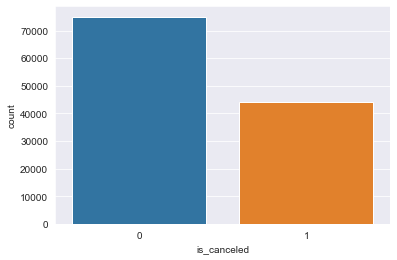

In [157]:
sns.countplot(x="is_canceled",data=df)

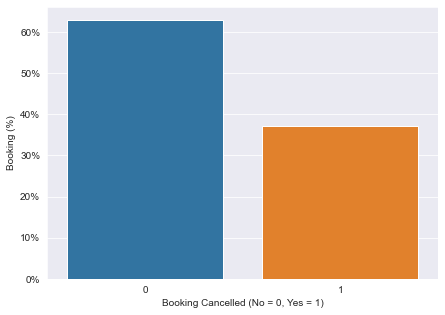

In [140]:
import matplotlib.ticker as mtick
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

In [141]:
df_not_canceled = df[df['is_canceled'] == 0]

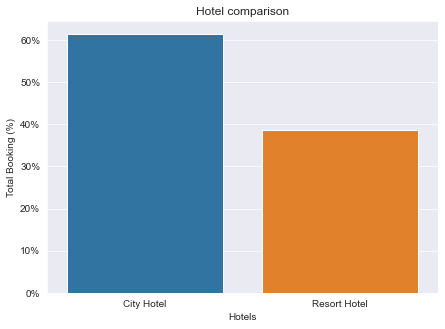

In [142]:
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

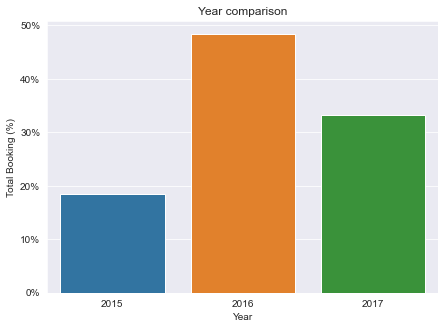

In [143]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

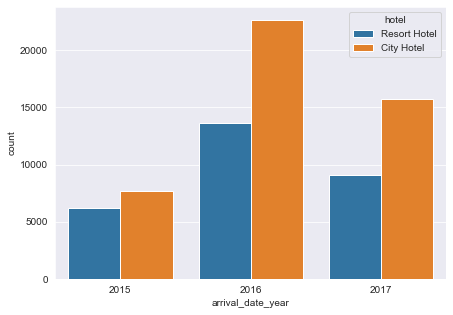

In [144]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

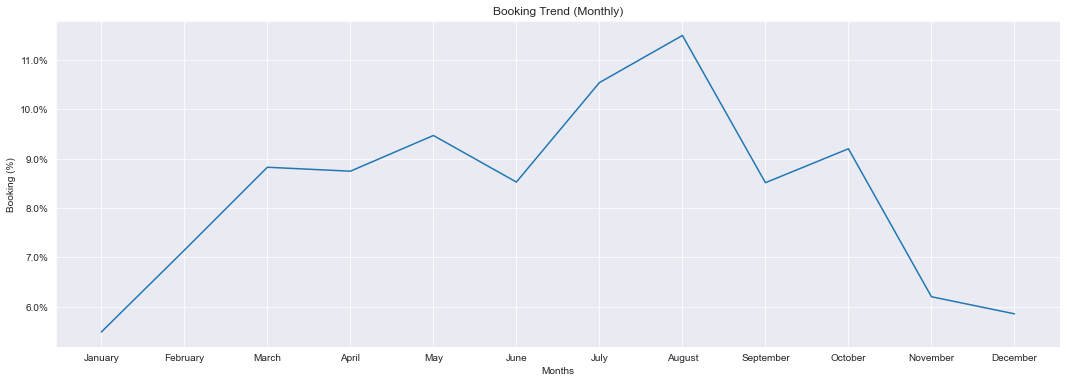

In [145]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

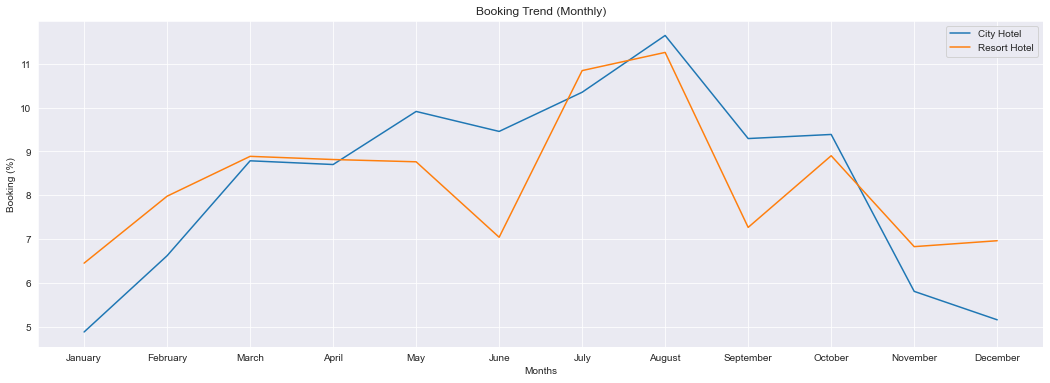

In [146]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']

sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100

sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')

sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

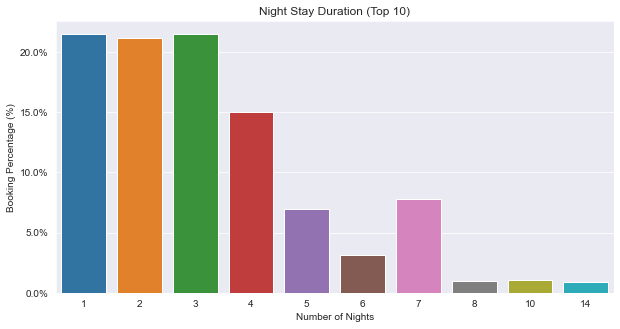

In [158]:
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

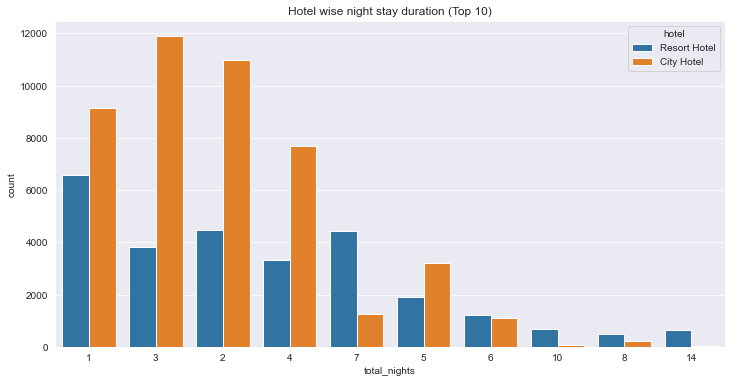

In [159]:
df_not_canceled.loc[:,'total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlabel('No of Nights')
ax.set_ylabel('No of Nights')
ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

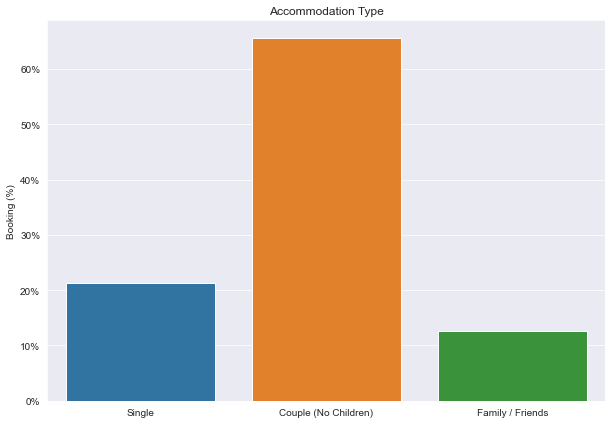

In [160]:
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]

names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]

plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

In [161]:
df_subset = df.copy()

df_subset['Room'] = 0
df_subset.loc[ df_subset['reserved_room_type'] == df_subset['assigned_room_type'] , 'Room'] = 1

df_subset['net_cancelled'] = 0
df_subset.loc[ df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'] , 'net_cancelled'] = 1

In [162]:
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)

In [163]:
df_subset = df_subset.drop(['reservation_status'], axis=1)

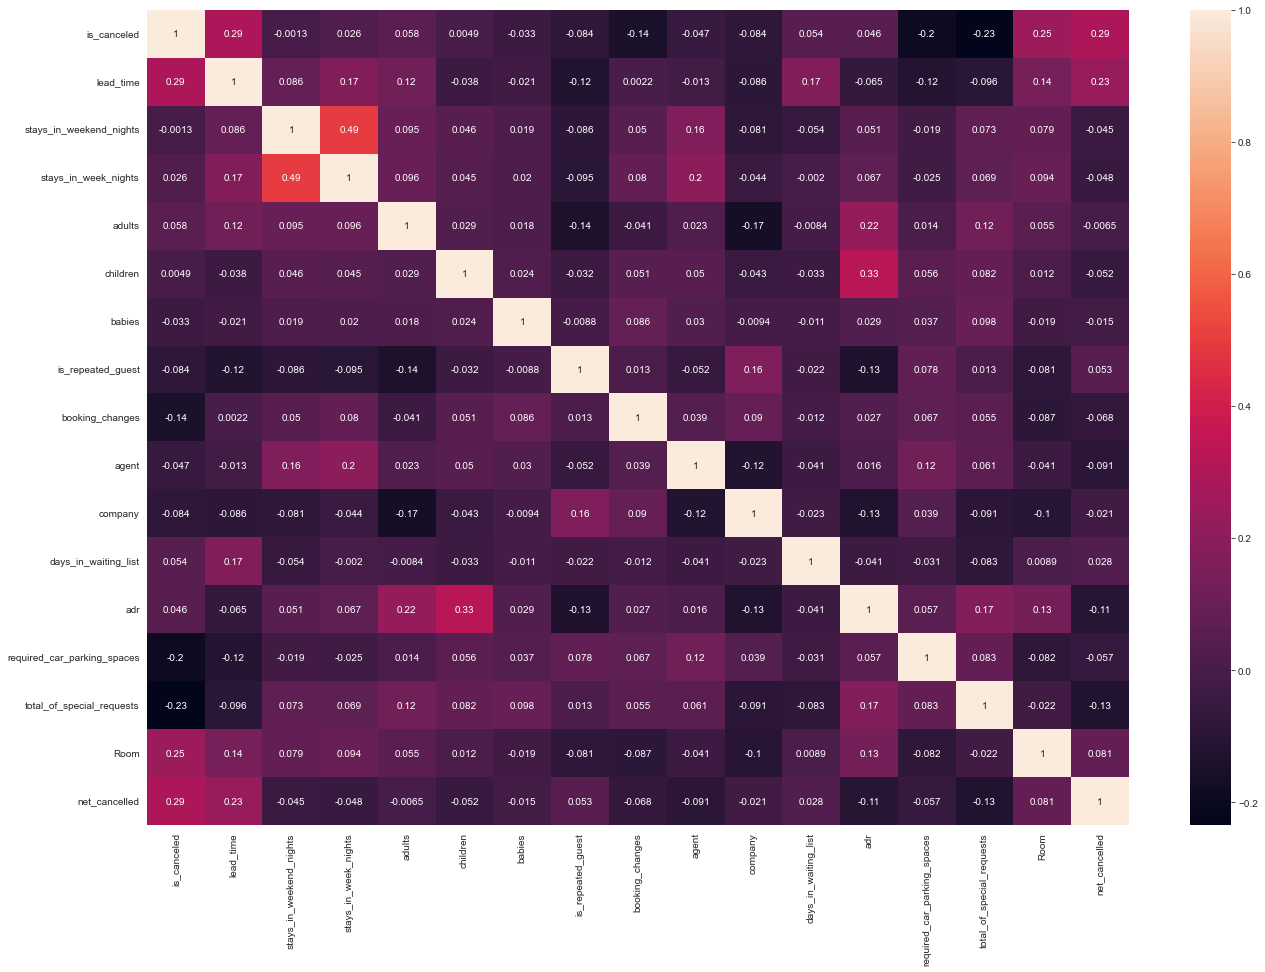

In [164]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(), annot=True, ax=ax);

In [171]:
def transform(dataframe):
    
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    
    categorical_features = list(dataframe.columns[dataframe.dtypes == object])
    
    return dataframe[categorical_features].apply(lambda x: le.fit_transform(x))

df = transform(df)

In [172]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = data_split(df_subset, 'is_canceled')

In [167]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf

clf= train(x_train, y_train)

ValueError: could not convert string to float: 'Resort Hotel'

In [169]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

NameError: name 'clf' is not defined

In [170]:
prediction = clf.predict(x_train.iloc[10].values.reshape(1,-1))

actual_value = y_train.iloc[10]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

NameError: name 'clf' is not defined